In [1]:
%load_ext kedro.extras.extensions.ipython

2022-04-16 14:51:17,173 - root - INFO - Updated path to Kedro project: C:\Users\Lianz\Documents\medgc-tesis
2022-04-16 14:51:19,043 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be 

2022-04-16 14:51:49,073 - root - INFO - ** Kedro project MEDGC Tesis
2022-04-16 14:51:49,077 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
predicciones_afn = catalog.load("modelo_afn_predicciones")
predicciones_dann = catalog.load("modelo_dann_predicciones")
predicciones_adda = catalog.load("modelo_adda_predicciones")
predicciones_source_only = catalog.load("modelo_source_only_predicciones")
predicciones_target_only = catalog.load("modelo_target_only_predicciones")

2022-04-16 14:51:49,135 - kedro.io.data_catalog - INFO - Loading data from `modelo_afn_predicciones` (CSVDataSet)...
2022-04-16 14:51:49,364 - kedro.io.data_catalog - INFO - Loading data from `modelo_dann_predicciones` (CSVDataSet)...
2022-04-16 14:51:49,536 - kedro.io.data_catalog - INFO - Loading data from `modelo_adda_predicciones` (CSVDataSet)...
2022-04-16 14:51:49,720 - kedro.io.data_catalog - INFO - Loading data from `modelo_source_only_predicciones` (CSVDataSet)...
2022-04-16 14:51:49,913 - kedro.io.data_catalog - INFO - Loading data from `modelo_target_only_predicciones` (CSVDataSet)...


In [3]:
import pandas as pd

In [5]:
for algoritmo, prediccion in zip(['afn', 'dann', 'adda', 'source_only', 'target_only'], [predicciones_afn, predicciones_dann, predicciones_adda, predicciones_source_only, predicciones_target_only]):
    prediccion['algoritmo'] = algoritmo

predicciones = pd.concat( [predicciones_afn, predicciones_dann, predicciones_adda, predicciones_source_only, predicciones_target_only], ignore_index=True)
predicciones = predicciones.drop(columns=['cant_digitos', 'min_size_digitos', 'max_size_digitos', 'min_prop_blanco_digitos', 'max_prop_blanco_digitos'])
predicciones['acierto'] = (predicciones['votos'] == predicciones['voto_predicho']).astype(int)

In [6]:
predicciones.groupby(['algoritmo', 'partido', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179519   
                                                           SENADORES NACIONALES         184205   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32303   
                                                           SENADORES NACIONALES          32142   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         460867   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          52393   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          33969   
                                                           SENADORES NACIONALES          32690   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          58868   
                                                           SENADORES NACIONALES          55623   

                                                                                 cantidad_pred  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         246919   
                                                           SENADORES NACIONALES         257953   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES         108410   
                                                           SENADORES NACIONALES         106303   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         562640   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          90836   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          52253   
                                                           SENADORES NACIONALES          58380   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          83431   
                                                           SENADORES NACIONALES          78624   

                                                                                 iou_promedio  \
algoritmo   partido                                        tipo                                 
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES      0.802970   
                                                           SENADORES NACIONALES      0.791623   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES      0.832252   
                                                           SENADORES NACIONALES      0.832327   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES      0.828097   
...                                                                                       ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES      0.915661   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES      0.927821   
                                                           SENADORES NACIONALES      0.926236   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES      0.925180   
                                                           SENADORES NACIONALES      0.924186   

                                                                                 acierto_exacto_promedio  
algoritmo   partido                                        tipo                                           
adda        FRENTE AMPLIO PROGRESISTA                  

In [7]:
predicciones.groupby(['algoritmo', 'partido']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                                         
adda        FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
afn         FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
dann        FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
source_only FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
target_only FRENTE AMPLIO PROGRESISTA                              363724   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
            FRENTE DE TODOS                                        937135   
            JUNTOS POR EL CAMBIO                                  1194242   
            PODEMOS                                                 53314   
            PRIMERO SANTA FE                                        47220   
            SOBERANIA POPULAR                                      119014   
            SOMOS FUTURO                                            66659   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   

                                                            cantidad_pred  \
algoritmo   partido                                                         
adda        FRENTE AMPLIO PROGRESISTA                              504872   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         214713   
            FRENTE DE TODOS                                       1161072   
            JUNTOS POR EL CAMBIO                       

In [8]:
predicciones.groupby(['algoritmo', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  cantidad_pred  iou_promedio  \
algoritmo   tipo                                                               
adda        DIPUTADOS NACIONALES        1476354        2376934      0.813903   
            SENADORES NACIONALES        1483890        2387589      0.814661   
afn         DIPUTADOS NACIONALES        1476354        6685118      0.542125   
            SENADORES NACIONALES        1483890        6589514      0.540201   
dann        DIPUTADOS NACIONALES        1476354        2424740      0.770638   
            SENADORES NACIONALES        1483890        2414102      0.774074   
source_only DIPUTADOS NACIONALES        1476354        4119737      0.601810   
            SENADORES NACIONALES        1483890        4199586      0.598914   
target_only DIPUTADOS NACIONALES        1476354        1598171      0.923282   
            SENADORES NACIONALES        1483890        1616992      0.922246   

                                  acierto_exacto_promedio  
algoritmo   tipo                                           
adda        DIPUTADOS NACIONALES                 0.757122  
            SENADORES NACIONALES                 0.758128  
afn         DIPUTADOS NACIONALES                 0.361031  
            SENADORES NACIONALES                 0.360881  
dann        DIPUTADOS NACIONALES                 0.705481  
            SENADORES NACIONALES                 0.709019  
source_only DIPUTADOS NACIONALES                 0.482320  
            SENADORES NACIONALES                 0.481331  
target_only DIPUTADOS NACIONALES                 0.896467  
            SENADORES NACIONALES                 0.894355

In [9]:
from matplotlib import pyplot as plt

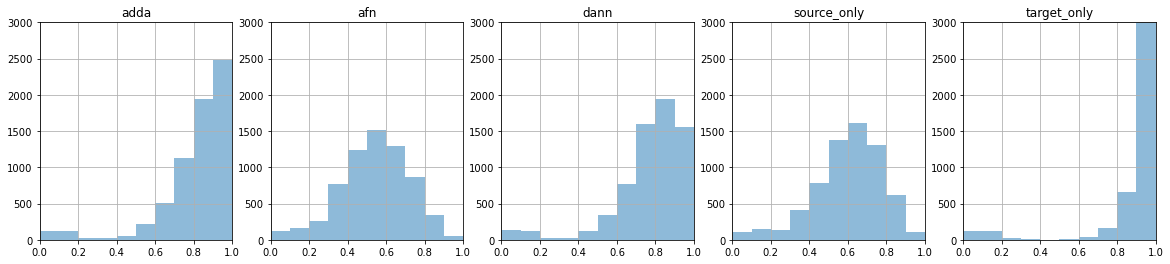

In [12]:
ious = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        iou=('iou', 'mean')
    )
    .reset_index()
    .groupby('algoritmo')['iou']
)

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 4))
for (i, d), ax in zip(ious, axes):
    d.hist(alpha=0.5, label=i, ax=ax)
    ax.set_title(i)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3_000)

plt.show()


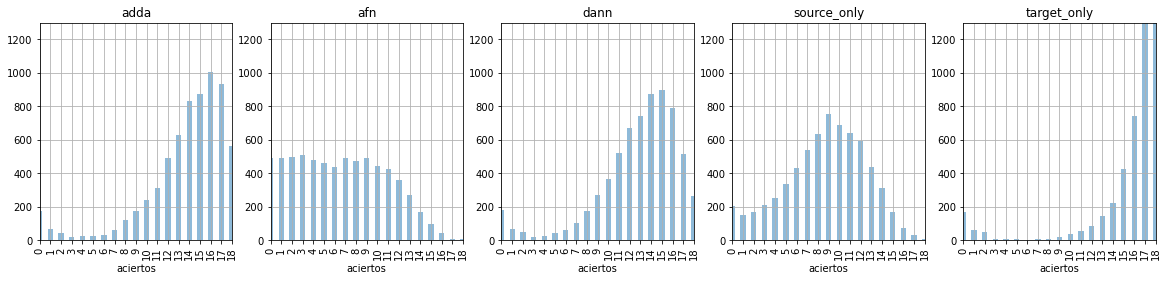

In [13]:
aciertos = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        aciertos=('acierto', 'sum')
    )
    .reset_index()
    .groupby(['algoritmo', 'aciertos']).size()
    .reset_index()
    .rename(columns={0: 'cantidad'})
    .groupby(['algoritmo'])
)

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20, 4))
for (i, d), ax in zip(aciertos, axes):
    d.set_index('aciertos').plot(kind='bar', alpha=0.5, label=i, ax=ax, legend=False)
    ax.set_title(i)
    ax.grid()
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 1_300)

plt.show()

In [14]:
(
    predicciones
    .query("algoritmo == 'adda'")
    .groupby('id_telegrama')
    .agg(iou=('iou', 'mean'))
    .query("iou < 0.4")
).tail(10)

,iou
id_telegrama,
2102108032X,0.212963
2102108037X,0.000000
2102108046X,0.157407
2102208056X,0.111111
2102208059X,0.074074
2102208062X,0.129630
2102208063X,0.148148
2102208066X,0.000000
2102208172X,0.361111
